In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,area,floorRange,typeOfSale,price,propertyType,typeOfArea,mktSegment,Year,region
0,159.3,Ground,Resale,2630000,Terrace,Land,RCR,2020,West
1,228.4,Ground,Resale,5188888,Semi-detached,Land,RCR,2024,West
2,201.0,01-05,Resale,3000000,Condominium,Strata,CCR,2024,Central
3,77.0,36-40,Sub Sale,1940000,Apartment,Strata,RCR,2024,Central
4,93.0,01-05,Resale,1500000,Apartment,Strata,RCR,2020,Central


In [6]:
df.describe()

,area,price,Year
count,3538.000000,3.538000e+03,3538.000000
mean,208.979339,3.549477e+06,2022.170435
std,206.652366,3.758724e+06,1.807551
min,30.000000,3.400000e+05,2019.000000
25%,96.000000,1.460000e+06,2020.000000
50%,146.000000,2.400000e+06,2023.000000
75%,240.000000,4.071250e+06,2024.000000
max,1654.400000,3.280000e+07,2024.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3538 non-null   float64
 1   floorRange    3538 non-null   object 
 2   typeOfSale    3538 non-null   object 
 3   price         3538 non-null   int64  
 4   propertyType  3538 non-null   object 
 5   typeOfArea    3538 non-null   object 
 6   mktSegment    3538 non-null   object 
 7   Year          3538 non-null   int64  
 8   region        3538 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 248.9+ KB


In [9]:
df.isnull().sum()

area            0
floorRange      0
typeOfSale      0
price           0
propertyType    0
typeOfArea      0
mktSegment      0
Year            0
region          0
dtype: int64

In [11]:
for i in df.columns:
    print(i, df[i].value_counts())

area area
117.0    30
115.0    30
92.0     28
150.0    28
108.0    28
         ..
398.9     1
190.7     1
535.0     1
199.5     1
349.0     1
Name: count, Length: 1325, dtype: int64
floorRange floorRange
01-05     1415
Ground    1314
06-10      416
11-15      205
16-20       91
21-25       39
26-30       30
31-35       15
36-40        7
41-45        2
B1-B5        2
56-60        1
46-50        1
Name: count, dtype: int64
typeOfSale typeOfSale
Resale      3374
New Sale     113
Sub Sale      51
Name: count, dtype: int64
price price
1300000     28
1600000     27
3300000     26
3200000     25
1400000     24
            ..
705000       1
11850000     1
1042000      1
10388000     1
1052000      1
Name: count, Length: 1270, dtype: int64
propertyType propertyType
Apartment                1507
Condominium               693
Terrace                   566
Semi-detached             361
Detached                  222
Strata Terrace             88
Executive Condominium      37
Strata Semi-detached   

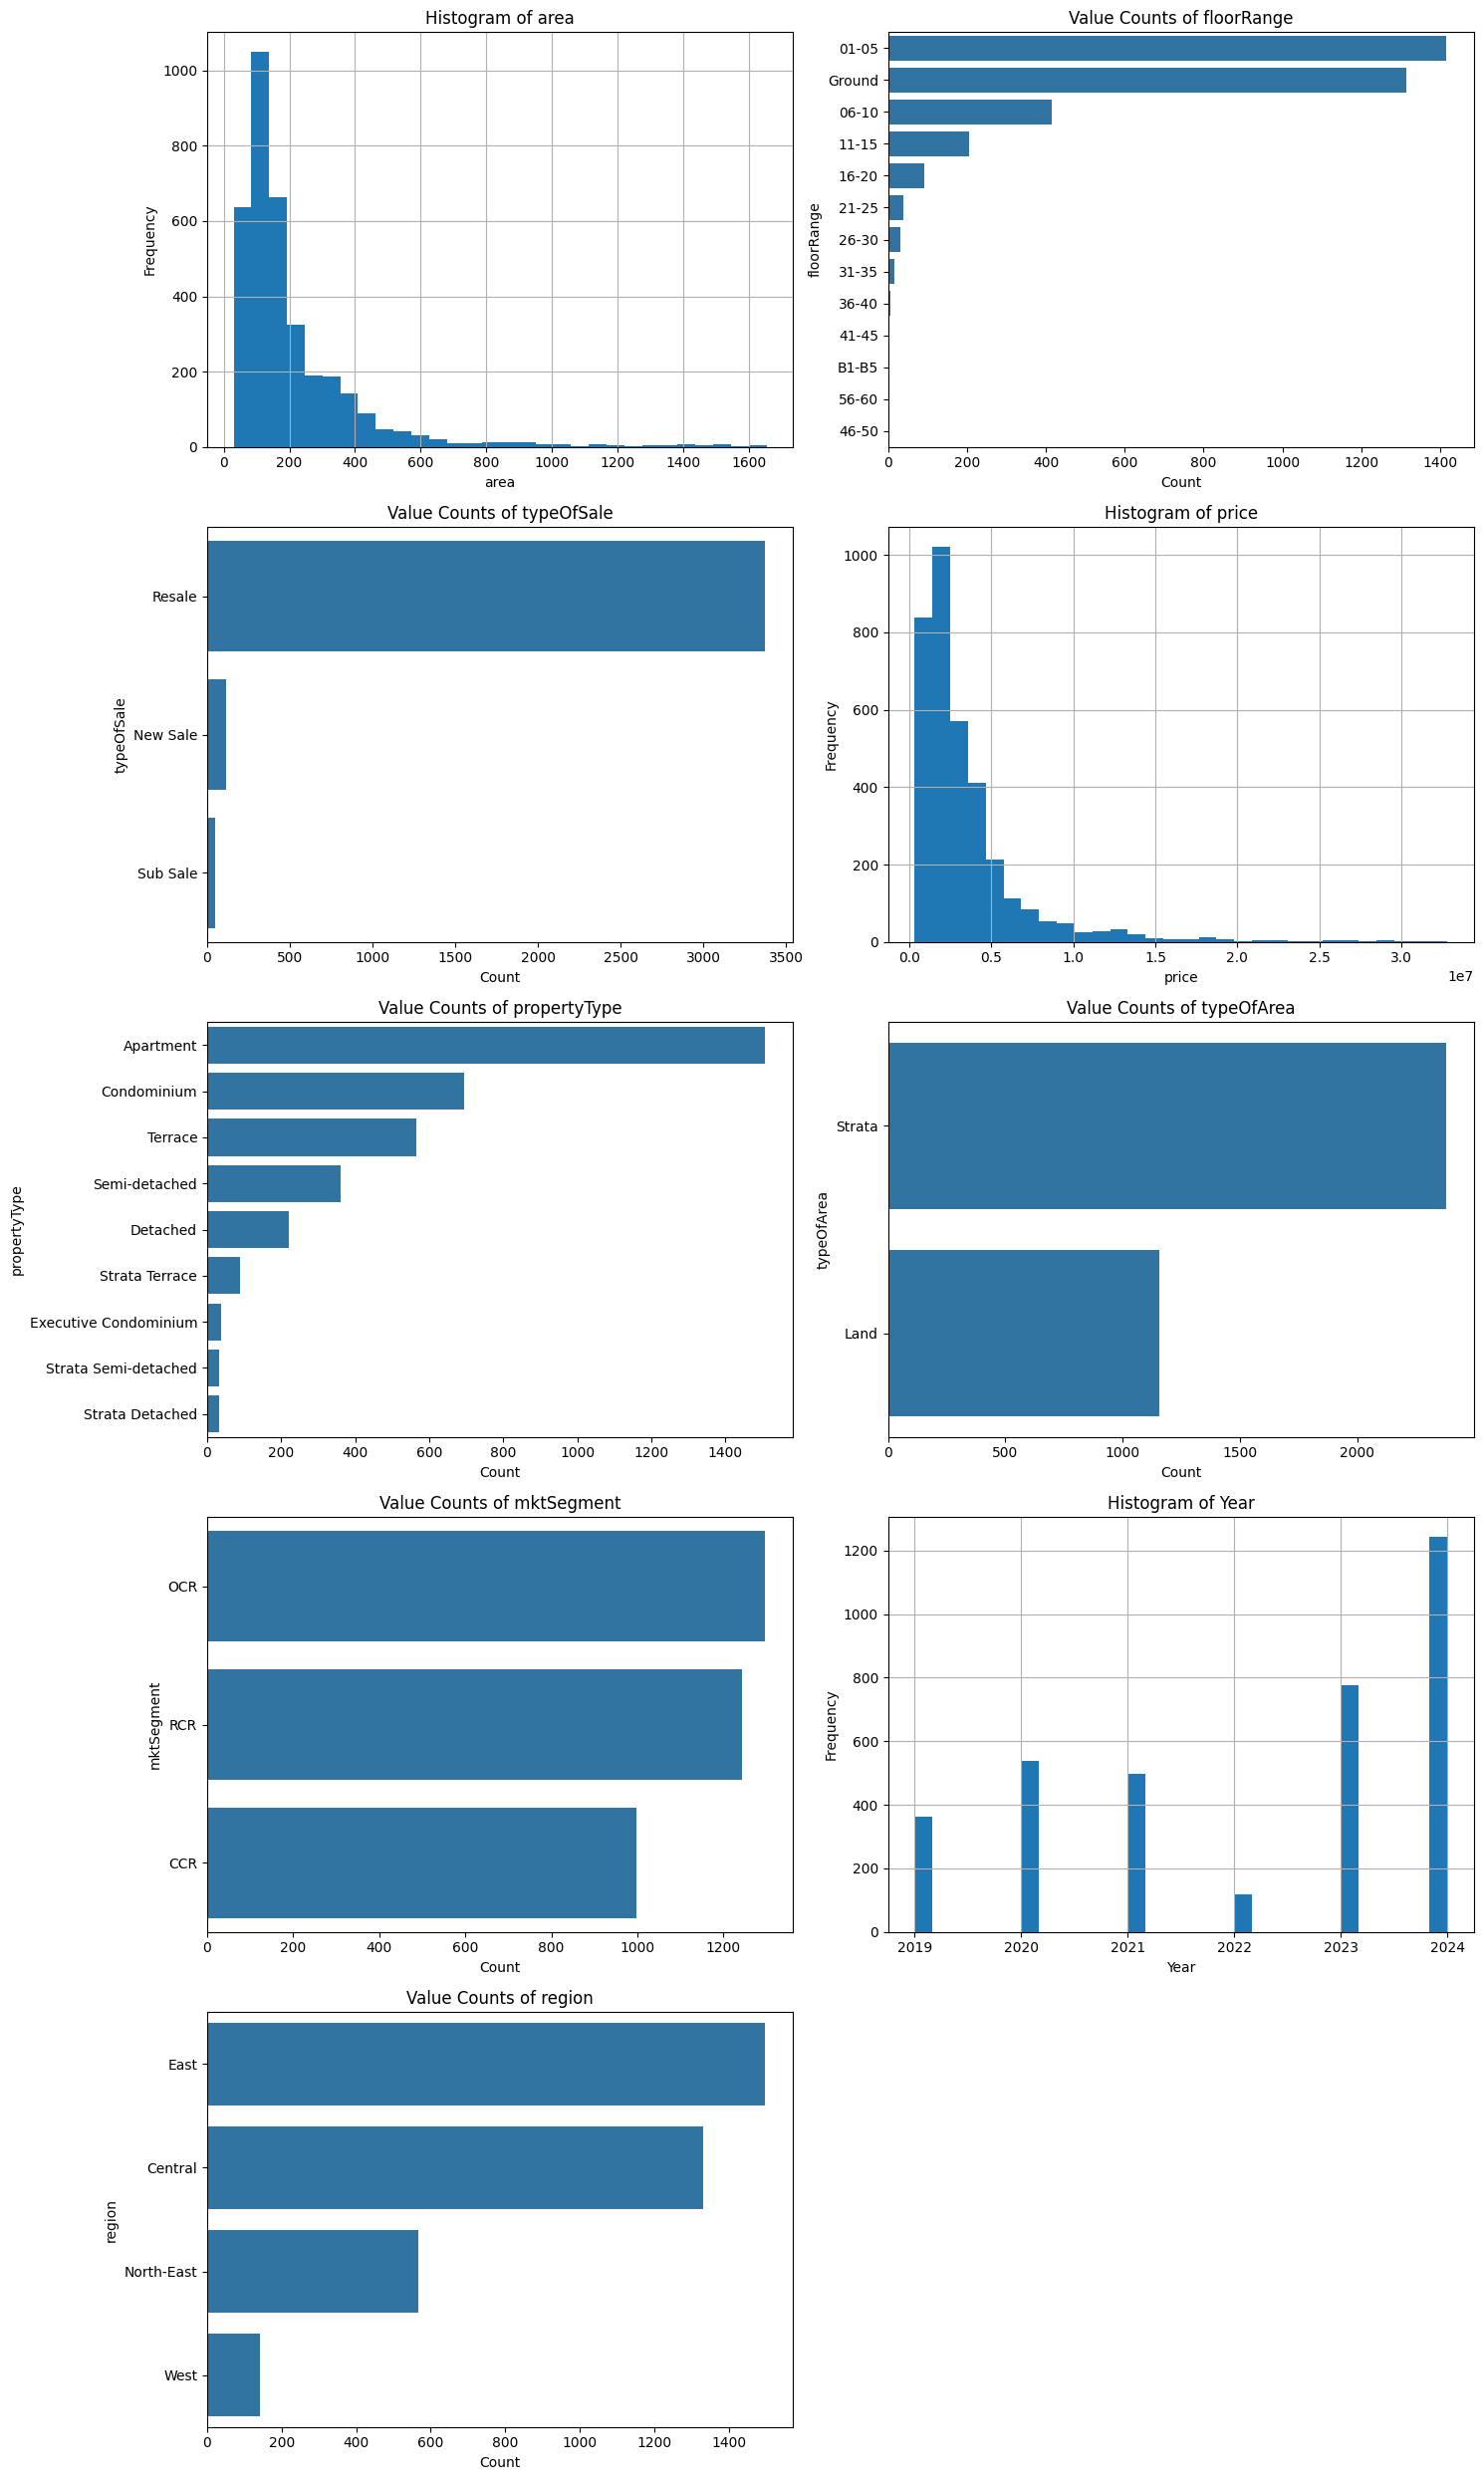

In [16]:
import math

# Determine the number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    if df[col].dtype in ['object', 'category']:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Value Counts of {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    elif df[col].dtype in ['int64', 'float64']:
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()